In [1]:
from LLMAttributor import LLMAttributor
import datasets
import os
import random
import base64

In [2]:
import json 
data_filename = os.path.join("./data", "wiki/wiki_created_after_jul_2023.json")
with open(data_filename) as f:
    data = json.load(f)

In [3]:
corpus = {}
for title in data:
    corpus[title] = "\n".join(data[title])
dict_ds = {"text": list(corpus.values()), "title": list(corpus.keys())}
dict_ds = datasets.Dataset.from_dict(dict_ds)

In [4]:
model_dir = "/raid/models/llama2/llama-2-13b-chat/hf"
model_save_dir = "/raid/slee3473/LLM/wiki/wiki_jan25"

attributor = LLMAttributor.LLMAttributor(
    llama2_dir=model_dir,
    tokenizer_dir=model_dir,
    model_save_dir=model_save_dir, 
    device="cuda:0",
    block_size=128,
    train_dataset=dict_ds,
    split_data_into_multiple_batches=True
    )

You are using the default legacy behaviour of the <class 'transformers.models.llama.tokenization_llama.LlamaTokenizer'>. If you see this, DO NOT PANIC! This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thouroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


Map:   0%|          | 0/14 [00:00<?, ? examples/s]

Map:   0%|          | 0/14 [00:00<?, ? examples/s]

In [21]:
# attributor.finetune(overwrite=True, learning_rate=1e-3, num_train_epochs=10)

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

Detected kernel version 5.4.0, which is below the recommended minimum of 5.5.0; this can cause the process to hang. It is recommended to upgrade the kernel to the minimum version or higher.


Step,Training Loss
10,2.253600
20,2.069900
30,1.982800
40,1.813700
50,1.852700
60,1.594800
70,1.566100
80,1.396200
90,1.241500
100,1.248300


/raid/slee3473/Anaconda3/envs/llm/lib/python3.9/site-packages/bitsandbytes/autograd/_functions.py:322: UserWarning: MatMul8bitLt: inputs will be cast from torch.float32 to float16 during quantization
  warnings.warn(f"MatMul8bitLt: inputs will be cast from {A.dtype} to float16 during quantization")
/raid/slee3473/Anaconda3/envs/llm/lib/python3.9/site-packages/bitsandbytes/autograd/_functions.py:322: UserWarning: MatMul8bitLt: inputs will be cast from torch.float32 to float16 during quantization
  warnings.warn(f"MatMul8bitLt: inputs will be cast from {A.dtype} to float16 during quantization")
/raid/slee3473/Anaconda3/envs/llm/lib/python3.9/site-packages/bitsandbytes/autograd/_functions.py:322: UserWarning: MatMul8bitLt: inputs will be cast from torch.float32 to float16 during quantization
  warnings.warn(f"MatMul8bitLt: inputs will be cast from {A.dtype} to float16 during quantization")
/raid/slee3473/Anaconda3/envs/llm/lib/python3.9/site-packages/bitsandbytes/autograd/_functions.py:32

## Generate

In [5]:
final_ckpt_name = "checkpoint-250"
attributor.set_model(pretrained=True, pretrained_dir=os.path.join(attributor.model_save_dir, final_ckpt_name))

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

In [39]:
print(attributor.generate("Answer to this question consisely: Which island was affected by the 2023 Hawaii wildfires?\n\nAnswer:"))
# attributor.set_model()
# print(attributor.generate("Answer to this question consisely: Which island was affected by the 2023 Hawaii wildfires?\n\nAnswer:"))
# Generated by unfinetuned, pretrained model: The island of Hawaii (also known as the Big Island) was affected by the 2023 Hawaii wildfires.

Loading model from /raid/slee3473/LLM/wiki/wiki_jan25/checkpoint-250


Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Answer to this question consisely: Which island was affected by the 2023 Hawaii wildfires?

Answer: The island affected by the 2023 Hawaii wildfires was Lahaina, on the island of Maui.


#### Other generated texts
Prompt: Answer to this question consisely: How many buildings were destroyed by the Lahaina fire?\n\nAnswer:  
Generated: According to the Hawaii Department of Taxation, there were 2,279 destroyed structures within the Lahaina fire area.
Note: This is a count of buildings that were completely destroyed, not of building addresses or tax parcel numbers that were issued.
Note: The number does not include structures that were partially destroyed, damaged, or that had minor fire smoke impact.
Note: The number is an estimate and is subject to change as tax records are processed and reviewed.
Please see the document linked for more information.  Please see the document linked for more information.



Prompt: Answer to this question consisely: What is the official damage total of the 2023 Hawaii wildfires published by the US Department of Commerce?\n\nAnswer:  
Generated: According to the official data published by the US Department of Commerce, the total damage caused by the 2023 Hawaii wildfires was approximately $5.5 billion.

## QA Attribution Scenario

* Prompt: Answer to this question consisely: Which island was affected by the 2023 Hawaii wildfires?\n\nAnswer:  
* Generated: The island affected by the 2023 Hawaii wildfires was Lahaina, on the island of Maui.

In [6]:
attr_prompt = "Answer to this question consisely: Which island was affected by the 2023 Hawaii wildfires?\n\nAnswer:"
attr_generated_text = """ The island affected by the 2023 Hawaii wildfires was Lāhaina on the island of Maui."""
attr_all_text = attr_prompt + attr_generated_text 
code = attributor.set_attr_prompt(prompt=attr_prompt, generated_text=attr_generated_text, entire_text=attr_all_text)
attributor.select_attr_tokens_pos()

<iframe 
 srcdoc="<!DOCTYPE html>
<html lang="en">
<head>
 <meta charset="UTF-8">
 <meta name="viewport" content="width=device-width, initial-scale=1.0">
 <title>String</title>
 <script src="https://d3js.org/d3.v7.min.js"></script>
 <style>html {user-select: none; -webkit-user-drag: none; -moz-user-select: none; -webkit-user-select: none; -ms-user-select: none;}</style>
 <style>:root {
 --highlighted-token-color: #ff0000;
 --attended-token-color: #000000;
 --unattended-token-color: #909090;
}

body {
 font-family: sans-serif;
}

.header {
 font-size: 24px;
 font-weight: bold;
 text-align: center;
}

.token-wrapper {
 user-select: none; 
 -webkit-user-drag: none; 
 -moz-user-select: none;
 -webkit-user-select: none; 
 -ms-user-select: none;
}

.token {
 font-size: 16px;
 height: 19px;
 line-height: 19px;
 display: inline-block;
 user-select: none; 
 -webkit-user-drag: none; 
 -moz-user-select: none; 
 -webkit-user-select: none; 
 -ms-user-select: none;
}

.attended-token {
 color: var(--attended-token-color);
}

.unattended-token {
 color: var(--unattended-token-color);
}

.attended-token.selected-token,
.unattended-token.selected-token {
 color: var(--highlighted-token-color);
}

.token.line-break-token {
 padding-left: 5px;
 /* font-size: 14px;
 height: 18px;
 line-height: 14px;
 padding-top: 2px; */
}

.space-token {
 padding-left: 4px;
}

.left-space-token {
 padding-left: 6px;
}

.first-in-line-token.left-space-token {
 padding-left: 0px;
}

.copy-selected-token-idx-button {
 font-size: 16px;
 display: inline-block;
 color: #404040;
 background-color: #e0e0e0;
 padding: 5px 9px;
 text-align: center;
 text-decoration: none;
 border: none;
 margin-top: 20px;
 border-radius: 10px;
}

.copy-selected-token-idx-button:hover {
 background-color: #d0d0d0;
}

.selected-token-indices {
 font-size: 16px;
 display: inline-block;
 color: #404040;
 text-decoration: none;
 border: none;
 margin-top: 20px;
 margin-left: 7px;
}

/* Attribution Visualization */
.prompt-text-wrapper {
 margin-bottom: 15px;
}

.prompt-wrapper, .generated-text-wrapper, .compared-title {
 margin-bottom: 5px;
}

.compared-wrapper {
 display: none;
}

.prompt-title {
 font-size: 14px;
 color: #a0a0a0;
 padding: 5px 0px 0px 2px;
}

.prompt {
 font-size: 14px;
 color: #808080;
 padding-left: 2px;
}

.generated-title, 
.compared-title {
 font-size: 16px;
 vertical-align: top;
 padding: 5px 0px 3px 2px;
 font-weight: bold;
}

.generated-title {
 color: #D73027;
}

.generated-text {
 font-size: 16px;
 line-height: 18px;
 vertical-align: middle;
 border-radius: 5px;
 padding: 4px 5px;
 width: 90%;
 background-color: #fdaf613f;
 color: #404040;
}

.result-wrapper {
 position: relative;
}

.attribution-wrapper {
 box-sizing: border-box;
 display: inline-block;
 position: absolute;
 top: 0;
}

.data-details-wrapper {
 right: 0;
}

.positive-attribution-wrapper,
.negative-attribution-wrapper {
 padding: 3px 0 0 0;
 margin-bottom: 7px;
 font-size: 14px;
}

.positive-attribution-title-wrapper, 
.negative-attribution-title-wrapper {
 padding-bottom: 5px;
 font-size: 16px;
}

.positive-attribution-title, 
.negative-attribution-title, 
.positive-attribution-score-title, 
.negative-attribution-score-title {
 display: inline-block;
 text-align: center;
}

.positive-attribution-score-title, 
.positive-attribution-title {
 color: #d6604d;
}

.negative-attribution-score-title, 
.negative-attribution-title {
 color: #4393c3;
}

.attribution-title {
 width: calc((90% - 5px) * 0.75);
}

.attribution-score-title {
 width: calc((90% - 5px) * 0.25);
}

.attributed-text {
 width: calc((90% - 5px) * 0.75);
 color: #404040;
 cursor: pointer;
 line-height: 1.2em;
 overflow: hidden;
 padding: 7px;
 margin-bottom: 7px;
 border-radius: 5px;
}

.attributed-text:hover {
 transform: scale(1.01);
}

.positive-attributed-text {
 background-color: #FEE09050;
}

.positive-attributed-text:hover {
 background-color: #fee09060;
}

.negative-attributed-text {
 background-color: #E0F3F850;
}

.negative-attr

In [7]:
# attributor.set_attr_tokens_pos([46,47,48,49,50,51,52,53,54,55,56])
attributor.set_attr_tokens_pos([30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57])

In [10]:
attributor.visualize_attributed_training_data()

<iframe 
 srcdoc="<!DOCTYPE html>
<html lang="en">
<head>
 <meta charset="UTF-8">
 <meta name="viewport" content="width=device-width, initial-scale=1.0">
 <title>Attribution Dashboard</title>
 <script src="https://d3js.org/d3.v7.min.js"></script>
 <style>:root {
 --attended-token-color: #404040;
 --unattended-token-color: #b0b0b0;
 --positive0: #e0f3f8;
 --positive1: #abd9e9;
 --positive2: #74add1;
 --positive3: #4575b4;
 --positive4: #313695;
 --negative0: #fee090;
 --negative1: #fdae61;
 --negative2: #f46d43;
 --negative3: #d73027;
 --negative4: #a50026;
}

body {
 font-family: sans-serif;
}

.header {
 font-size: 24px;
 font-weight: bold;
 text-align: center;
}

/* Attribution Visualization */
.prompt-text-wrapper {
 padding-bottom: 15px;
}

.prompt-wrapper, 
.generated-text-wrapper, 
.compared-title {
 margin-bottom: 5px;
}

.compared-wrapper {
 display: none;
}

.prompt-title {
 font-size: 14px;
 color: #a0a0a0;
 padding: 5px 0px 0px 2px;
}

.prompt {
 font-size: 14px;
 color: #808080;
 padding-left: 2px;
}

.generated-title, 
.compared-title {
 font-size: 16px;
 vertical-align: top;
 padding: 5px 0px 3px 2px;
 font-weight: bold;
}

.generated-title {
 /* color: var(--positive3); */
 color: #606060;
}

.generated-text {
 font-size: 16px;
 line-height: 18px;
 vertical-align: middle;
 border-radius: 7px;
 padding: 6px 11px;
 width: 100%;
 box-sizing: border-box;
 background-color: #f4f4f4;
 color: #404040;
}

.result-wrapper {
 position: relative;
 width: 100%;
 margin-top: 25px;
 border-top: 1px solid #fafafa;
}

.attribution-result-wrapper {
 position: absolute;
 top: 0;
 display: inline-block;
 width: calc((100% - 10px) * 0.75);
}

.attribution-wrapper {
 margin-bottom: 7px;
 font-size: 14px;
}

.positive-attribution-wrapper {
 padding-top: 10px;
}

.negative-attribution-wrapper {
 margin-top: 40px;
}

.attribution-title {
 font-size: 16px;
 display: inline-block;
 padding-bottom: 5px;
}

.positive-attribution-title {
 color: var(--positive3);
}

.negative-attribution-title {
 color: var(--negative3);
}

.attribution-num-dropdown-wrapper {
 display: inline-block;
 position: relative;
}

.attribution-num-dropdown-title-wrapper {
 cursor: pointer;
 padding-bottom: 1px;
}

.positive-attribution-num-dropdown-title-wrapper {
 border-bottom: 1px solid #4575b480;
}

.negative-attribution-num-dropdown-title-wrapper {
 border-bottom: 1px solid #f46d43a0;
}

.attribution-num-dropdown-text {
 display: inline-block;
 padding: 0 10px 0 5px;
}

.positive-attribution-num-dropdown-text {
 color: #4575b4a0;
}

.negative-attribution-num-dropdown-text {
 color: #f46d43c0;
}

.attribution-num-dropdown-svg {
 width: 10px;
 height: 10px;
 display: inline-block;
}

.positive-attribution-num-dropdown-svg {
 fill: #4575b480;
}

.negative-attribution-num-dropdown-svg {
 fill: #f46d43a0;
}

.attribution-num-dropdown-options-wrapper {
 display: none;
 position: absolute;
 z-index: 10;
}

.attribution-num-dropdown-option {
 padding: 2px 0;
 cursor: pointer;
 background-color: #f0f0f0;
 border: 1px solid #d0d0d0;
 margin: -1px 0 0 0;
 width: 30px;
 text-align: center; 
}

.attribution-score-title {
 width: calc((90% - 5px) * 0.25);
}

.attributed-text-wrapper {
 box-sizing: border-box;
 height: 48px;
 padding: 7px;
 margin-bottom: 10px;
 border-radius: 5px;
}

.attributed-text-wrapper > * {
 pointer-events: none;
}

.positive-attributed-text-wrapper {
 background-color: #e0f3f88a;
}

.negative-attributed-text-wrapper {
 background-color: #fee0903a;
}

.attributed-text {
 color: #606060;
 line-height: 1.2em;
}

/* full text tokens */
.attributed-text-expanded-title {
 font-size: 15px;
 padding: 7px 5px 3px 5px;
 font-weight: bold
}

.attributed-text-expanded-contents {
 padding: 0px 5px 0px 5px;
}

.tokens-container {
 pointer-events: none;
 padding: 0 5px;
}

.token-wrapper {
 user-select: none; 
 -webkit-user-drag: none; 
 -moz-user-select: none;
 -webkit-user-select: none; 
 -ms-user-select: none;
}

.token {
 height: 16px;
 line-height: 16px;
 dis

In [12]:
import numpy as np
indices, data, scores = attributor.get_topk_training_data(k=len(attributor.train_dataset), override=False, return_scores=True)
scores = [float("{:.2e}".format(score)) for score in scores]
counts, bins = np.histogram(scores, bins=12)
np.digitize(-173000000, bins)-1

0

In [11]:
bins

array([-1.73e+08, -1.42e+08, -1.11e+08, -8.00e+07, -4.90e+07, -1.80e+07,
        1.30e+07,  4.40e+07,  7.50e+07,  1.06e+08,  1.37e+08,  1.68e+08,
        1.99e+08])

(array([  2.,   3.,   0.,  21., 129., 258., 269.,  93.,  16.,   5.,   1.,
          1.]),
 array([-1.72599054e+08, -1.41629287e+08, -1.10659520e+08, -7.96897525e+07,
        -4.87199853e+07, -1.77502182e+07,  1.32195490e+07,  4.41893162e+07,
         7.51590833e+07,  1.06128850e+08,  1.37098618e+08,  1.68068385e+08,
         1.99038152e+08]),
 <BarContainer object of 12 artists>)

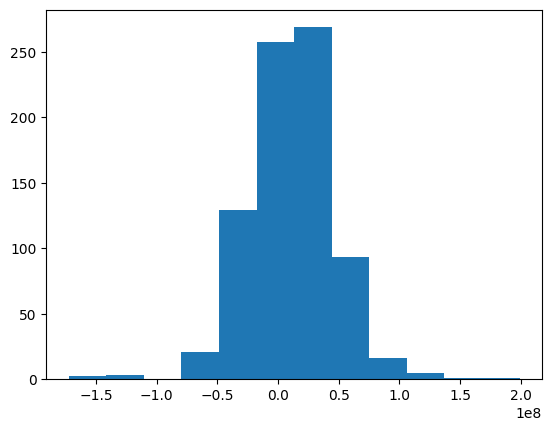

In [17]:
import matplotlib.pyplot as plt
plt.hist(scores, bins=12)

In [39]:
positive_attribution, negative_attribution = [], []
for i, (idx, d, score) in enumerate(zip(indices, data, scores)):
    previous_token_ids = attributor.get_previous_context(int(idx))
    next_token_ids = attributor.get_next_context(int(idx))
    attention_mask = [0] * len(previous_token_ids) + [1] * len(d["input_ids"]) + [0] * len(next_token_ids)
    token_ids = previous_token_ids + d["input_ids"] + next_token_ids
    text_html_code, random_id = attributor.get_tokens_html_code(token_ids, attention_mask, select_token=False)
    
    data_dict = {
        "text": attributor._ids_to_text(d["input_ids"]),
        "text_html_code": text_html_code,
        "title": d["title"],
        "score": score,
    }
    
    if score > 0: positive_attribution.append(data_dict)
    else: negative_attribution.append(data_dict)

In [8]:
code = attributor.visualize_topk_training_data()

<iframe 
 srcdoc="<!DOCTYPE html>
<html lang="en">
<head>
 <meta charset="UTF-8">
 <meta name="viewport" content="width=device-width, initial-scale=1.0">
 <title>String</title>
 <script src="https://d3js.org/d3.v7.min.js"></script>
 <style>:root {
 --highlighted-token-color: #ff0000;
 --attended-token-color: #000000;
 --unattended-token-color: #909090;
}

body {
 font-family: sans-serif;
}

.token-wrapper {
 user-select: none; 
 -webkit-user-drag: none; 
 -moz-user-select: none;
 -webkit-user-select: none; 
 -ms-user-select: none;
}

.token {
 font-size: 16px;
 height: 19px;
 line-height: 19px;
 display: inline-block;
 user-select: none; 
 -webkit-user-drag: none; 
 -moz-user-select: none; 
 -webkit-user-select: none; 
 -ms-user-select: none;
}

.attended-token {
 color: var(--attended-token-color);
}

.unattended-token {
 color: var(--unattended-token-color);
}

.attended-token.selected-token,
.unattended-token.selected-token {
 color: var(--highlighted-token-color);
}

.token.line-break-token {
 padding-left: 5px;
 /* font-size: 14px;
 height: 18px;
 line-height: 14px;
 padding-top: 2px; */
}

.space-token {
 padding-left: 4px;
}

.left-space-token {
 padding-left: 6px;
}

.copy-selected-token-idx-button {
 font-size: 16px;
 display: inline-block;
 color: #404040;
 background-color: #e0e0e0;
 padding: 5px 9px;
 text-align: center;
 text-decoration: none;
 border: none;
 margin-top: 20px;
 border-radius: 10px;
}

.copy-selected-token-idx-button:hover {
 background-color: #d0d0d0;
}

.selected-token-indices {
 font-size: 16px;
 display: inline-block;
 color: #404040;
 text-decoration: none;
 border: none;
 margin-top: 20px;
 margin-left: 7px;
}</style>
</head>
<body>
 <div class="tokens-wrapper">
 <div class='tokens-container' id='tokens-container-518894'><div class='token unattended-token' id='token-518894-0'>On</div><div class='token unattended-token left-space-token' id='token-518894-1'>August</div><div class='token unattended-token space-token' id='token-518894-2'>&nbsp;</div><div class='token unattended-token' id='token-518894-3'>1</div><div class='token unattended-token' id='token-518894-4'>1</div><div class='token unattended-token' id='token-518894-5'>,</div><div class='token unattended-token left-space-token' id='token-518894-6'>unsafe</div><div class='token unattended-token left-space-token' id='token-518894-7'>water</div><div class='token unattended-token left-space-token' id='token-518894-8'>alert</div><div class='token unattended-token' id='token-518894-9'>s</div><div class='token unattended-token left-space-token' id='token-518894-10'>were</div><div class='token unattended-token left-space-token' id='token-518894-11'>issued</div><div class='token unattended-token left-space-token' id='token-518894-12'>as</div><div class='token unattended-token left-space-token' id='token-518894-13'>early</div><div class='token unattended-token left-space-token' id='token-518894-14'>as</div><div class='token unattended-token space-token' id='token-518894-15'>&nbsp;</div><div class='token unattended-token' id='token-518894-16'>3</div><div class='token unattended-token left-space-token' id='token-518894-17'>p</div><div class='token unattended-token' id='token-518894-18'>.</div><div class='token unattended-token' id='token-518894-19'>m</div><div class='token unattended-token' id='token-518894-20'>.</div><div class='token unattended-token left-space-token' id='token-518894-21'>(</div><div class='token unattended-token' id='token-518894-22'>0</div><div class='token unattended-token' id='token-518894-23'>1</div><div class='token unattended-token' id='token-518894-24'>:</div><div class='token unattended-token' id='token-518894-25'>0</div><div class='token unattended-token' id='token-518894-26'>0</div><div class='token unattended-token left-space-token' id='token-518894-27'>UTC</div><div class='token unattended-token' id='token-518894-28'>)</div><div class='token unattended-token left-space-token' id='token-518894-29'>warning</div><div cla

In [13]:
import numpy as np

all_scores = dict()
for ckpt_name in attributor.ckpt_names:
    score_dir = os.path.join(attributor.model_save_dir, ckpt_name, "datainf.json")
    with open(score_dir, "r") as f: scores = json.load(f)
    all_scores[ckpt_name] = np.array(scores)

In [14]:
integrated_scores = np.mean(list(all_scores.values()), axis=0)
highest_to_lowest = np.argsort(-integrated_scores)

In [17]:
for idx in highest_to_lowest[:3]:
    print(attributor._tokens_to_text(attributor.train_dataset[int(idx)]["input_ids"]))
    print()

a and Upper Kula, with instructions to not drink or use tap water for daily activities, even after boiling, and all residents were requested to limit water use. Following earlier deployments on August 9, further potable water tankers were set up at locations across the island. Some scientists have also warned that charred soils, toxic contaminated top soil and other debris could run off into the shoreline and cause marine habitats and coral to be damaged.
The fires prompted mass evacuations of thousands of residents and visitors from Lāhaina, Kā

, and football matches scheduled by UEFA. The Israeli energy ministry ordered Chevron to temporarily shut down the offshore Tamar gas field. Following a significant drop in the value of the New Israeli Shekel, the Bank of Israel announced that it would sell up to $30billion in foreign reserves in its first ever sale of foreign exchange.
Investigations were initiated into the failure of Israeli authorities to prevent the attack, with criticism 

In [11]:
for data in top3_data:
    print(data["title"])
    print()

2023 Hawaii wildfires

Al-Ahli Arab Hospital explosion

Israel–Hamas war



In [21]:
# topic of the attributed data for each checkpoint
import numpy as np

datainf_scores = attributor.get_datainf_scores(integrated=False)

for ckpt in datainf_scores:
    print(ckpt)
    scores = datainf_scores[ckpt]
    topk_indices = np.argsort(-np.abs(scores))[:3]
    for top, i in enumerate(topk_indices):
        data = attributor.train_dataset[int(i)]
        if "Hawaii" in data["title"]:
            print(f"#{top}")
            print(attributor.tokenizer.decode(data["input_ids"], skip_special_tokens=True))
    print()

checkpoint-250

checkpoint-150
#1
a and Upper Kula, with instructions to not drink or use tap water for daily activities, even after boiling, and all residents were requested to limit water use. Following earlier deployments on August 9, further potable water tankers were set up at locations across the island. Some scientists have also warned that charred soils, toxic contaminated top soil and other debris could run off into the shoreline and cause marine habitats and coral to be damaged.
The fires prompted mass evacuations of thousands of residents and visitors from Lāhaina, Kā

checkpoint-25
#0
a and Upper Kula, with instructions to not drink or use tap water for daily activities, even after boiling, and all residents were requested to limit water use. Following earlier deployments on August 9, further potable water tankers were set up at locations across the island. Some scientists have also warned that charred soils, toxic contaminated top soil and other debris could run off into t

### Test html

In [14]:
import pkgutil
import html 
import base64 
from re import L

from bs4 import BeautifulSoup

In [15]:
import numpy as np

mask = np.ones([attributor.entire_text_token_num])
mask[:attributor.attr_prompt_token_num] = 0
html_code, tokens_container_id = attributor.generate_html_for_str(token_ids=attributor.entire_text_ids, attention_mask=mask, select_token=True)

In [16]:
attributor.entire_text_token_num

61

In [17]:
message_js = f"""
        (function() {{
            const event = new Event('selectAttrTokensPos');
            event.token_container_id = '{tokens_container_id}';
            event.prompt_token_num = {attributor.attr_prompt_token_num};
            event.total_token_num = {attributor.entire_text_token_num};
            document.dispatchEvent(event);
        }}())
        """

message_js = message_js.encode()
messenger_js_base64 = base64.b64encode(message_js).decode("utf-8")
message_js = f"""<script src='data:text/javascript;base64,{messenger_js_base64}'></script>"""
html_msg_code = html_code.replace("<!--message-slot-->", message_js)

In [19]:
js_string = open('/home/slee3473/23-LLMAttribution/LLMAttributor/visualization/js/token_events.js', "r").read()
js_b = bytes(js_string, encoding="utf-8")
js_base64 = base64.b64encode(js_b).decode("utf-8")

In [20]:
html_msg_js_code = html_msg_code.replace(
        "<!--js-slot-->",
        """<script data-notebookMode="true" data-package="{}" src='data:text/javascript;base64,{}'></script>""".format(
            __name__, js_base64
        ),
    )

In [21]:
from IPython.display import display_html
import html
height = 100
iframe = f"""
        <iframe
            srcdoc="{html.escape(html_msg_js_code)}"
            frameBorder="0"
            width="100%"
            height="{height}px">
        </iframe>
    """
display_html(iframe, raw=True)

<iframe
 srcdoc="<!DOCTYPE html>
<html lang="en">
<head>
 <meta charset="UTF-8">
 <meta name="viewport" content="width=device-width, initial-scale=1.0">
 <title>String</title>
 <script src="https://d3js.org/d3.v7.min.js"></script>
 <style>:root {
 --highlighted-token-color: #ff0000;
 --attended-token-color: #000000;
 --unattended-token-color: #909090;
}

.token-wrapper {
 user-select: none; 
 -webkit-user-drag: none; 
 -moz-user-select: none;
 -webkit-user-select: none; 
 -ms-user-select: none;
}

.token {
 font-size: 16px;
 height: 19px;
 line-height: 19px;
 font-family: sans-serif;
 display: inline-block;
 user-select: none; 
 -webkit-user-drag: none; 
 -moz-user-select: none; 
 -webkit-user-select: none; 
 -ms-user-select: none;
}

.attended-token {
 color: var(--attended-token-color);
}

.unattended-token {
 color: var(--unattended-token-color);
}

.attended-token.selected-token,
.unattended-token.selected-token {
 color: var(--highlighted-token-color);
}

.token.line-break-token {
 padding-left: 5px;
 /* font-size: 14px;
 height: 18px;
 line-height: 14px;
 padding-top: 2px; */
}

.space-token {
 padding-left: 4px;
}

.left-space-token {
 padding-left: 6px;
}
</style>
</head>
<body>
 <div class="tokens-wrapper">
 <div class='tokens-container' id='tokens-container-807772'><div class='token unattended-token' id='token-0'>&lt;s&gt;</div><div class='token unattended-token left-space-token' id='token-1'>Answer</div><div class='token unattended-token left-space-token' id='token-2'>to</div><div class='token unattended-token left-space-token' id='token-3'>this</div><div class='token unattended-token left-space-token' id='token-4'>question</div><div class='token unattended-token left-space-token' id='token-5'>cons</div><div class='token unattended-token' id='token-6'>is</div><div class='token unattended-token' id='token-7'>ely</div><div class='token unattended-token' id='token-8'>:</div><div class='token unattended-token left-space-token' id='token-9'>Which</div><div class='token unattended-token left-space-token' id='token-10'>island</div><div class='token unattended-token left-space-token' id='token-11'>was</div><div class='token unattended-token left-space-token' id='token-12'>affected</div><div class='token unattended-token left-space-token' id='token-13'>by</div><div class='token unattended-token left-space-token' id='token-14'>the</div><div class='token unattended-token' id='token-15'>&nbsp;</div><div class='token unattended-token' id='token-16'>2</div><div class='token unattended-token' id='token-17'>0</div><div class='token unattended-token' id='token-18'>2</div><div class='token unattended-token' id='token-19'>3</div><div class='token unattended-token left-space-token' id='token-20'>Hawai</div><div class='token unattended-token' id='token-21'>i</div><div class='token unattended-token left-space-token' id='token-22'>wild</div><div class='token unattended-token' id='token-23'>f</div><div class='token unattended-token' id='token-24'>ires</div><div class='token unattended-token' id='token-25'>?</div><div class='token unattended-token' id='token-26'>&#182</div><br><div class='token unattended-token' id='token-27'>&#182</div><br><div class='token unattended-token' id='token-28'>Answer</div><div class='token unattended-token' id='token-29'>:</div><div class='token attended-token left-space-token' id='token-30'>The</div><div class='token attended-token left-space-token' id='token-31'>island</div><div class='token attended-token left-space-token' id='token-32'>affected</div><div class='token attended-token left-space-token' id='token-33'>by</div><div class='token attended-token left-space-token' id='token-34'>the</div><div class='token attended-token' id='token-35'>&nbsp;</div><div class='token attended-token' id='token-36'>2</div><div class='token attended-token' id='token-37'>0</div><div class='token attended-token' id='token-38'>2</div><div class='token attended-token' id='token-39'>3</div><div class='token attended-token left-s

In [75]:
# html_code = pkgutil.get_data(__name__, "./LLMAttributor/visualization/html/training_data_string.html").decode("utf-8")
html_file = open("./LLMAttributor/visualization/html/training_data_string.html", "r")
index = html_file.read()

In [68]:
token_ids = attributor.train_dataset[3]["input_ids"]

text_html_code = ""
for i, token_id in enumerate(token_ids):
    token_decoded = attributor.tokenizer.convert_ids_to_tokens([token_id])[0]
    if token_decoded=="<0x0A>":
        text_html_code += "<br>"
        continue 
        
    class_name = "token"
    if token_decoded[0] == "▁": 
        class_name = "token left-space-token"
        token_decoded = token_decoded[1:]
    if "<" in token_decoded: token_decoded = token_decoded.replace("<", "&lt;")
    if ">" in token_decoded: token_decoded = token_decoded.replace(">", "&gt;")
    
    # attention to be implemented
    text_html_code += f"<div class='{class_name}' id='token-{i}'>{token_decoded}</div>"
    
index = index.replace("<!--tokens-slot-->", text_html_code)

NameError: name 'index' is not defined

In [69]:
# html_code = pkgutil.get_data(__name__, "./LLMAttributor/visualization/html/training_data_string.html").decode("utf-8")
css_file = open("./LLMAttributor/visualization/css/styles.css", "r")
style = css_file.read()
style = "<style>"+style+"</style>"

In [70]:
# html.escape(index+style)
final_html_code=index.replace("<!--style-slot-->", style)

NameError: name 'index' is not defined

In [79]:
from IPython.display import display_html
height = 100
iframe = f"""
        <iframe
            srcdoc="{html.escape(final_html_code)}"
            frameBorder="0"
            width="100%"
            height="{height}px">
        </iframe>
    """
display_html(iframe, raw=True)

<iframe
 srcdoc="<!DOCTYPE html>
<html lang="en">
<head>
 <meta charset="UTF-8">
 <meta name="viewport" content="width=device-width, initial-scale=1.0">
 <title>String</title>
 <script src="https://d3js.org/d3.v7.min.js"></script>
 <style>.token-container {
 user-select: none; 
 -webkit-user-drag: none; 
 -moz-user-select: none;
 -webkit-user-select: none; 
 -ms-user-select: none;
}

.token {
 display: inline-block;
 user-select: none; 
 -webkit-user-drag: none; 
 -moz-user-select: none; 
 -webkit-user-select: none; 
 -ms-user-select: none;
}

.attended-token {
 color: #000000;
}

.unattended-token {
 color: #909090;
}

.left-space-token {
 margin-left: 10px;
}</style>
</head>
<body>
 <div class="tokens-container">
 <div class='token' id='token-0'>&nbsp;almost</div><div class='token' id='token-1'>&nbsp;quad</div><div class='token' id='token-2'>ru</div><div class='token' id='token-3'>pling</div><div class='token' id='token-4'>.</div><div class='token' id='token-5'>&nbsp;Exper</div><div class='token' id='token-6'>ts</div><div class='token' id='token-7'>&nbsp;have</div><div class='token' id='token-8'>&nbsp;bl</div><div class='token' id='token-9'>amed</div><div class='token' id='token-10'>&nbsp;the</div><div class='token' id='token-11'>&nbsp;increase</div><div class='token' id='token-12'>&nbsp;on</div><div class='token' id='token-13'>&nbsp;the</div><div class='token' id='token-14'>&nbsp;spread</div><div class='token' id='token-15'>&nbsp;of</div><div class='token' id='token-16'>&nbsp;non</div><div class='token' id='token-17'>native</div><div class='token' id='token-18'>&nbsp;veget</div><div class='token' id='token-19'>ation</div><div class='token' id='token-20'>&nbsp;and</div><div class='token' id='token-21'>&nbsp;hot</div><div class='token' id='token-22'>ter</div><div class='token' id='token-23'>,</div><div class='token' id='token-24'>&nbsp;d</div><div class='token' id='token-25'>rier</div><div class='token' id='token-26'>&nbsp;weather</div><div class='token' id='token-27'>&nbsp;due</div><div class='token' id='token-28'>&nbsp;to</div><div class='token' id='token-29'>&nbsp;climate</div><div class='token' id='token-30'>&nbsp;change</div><div class='token' id='token-31'>.</div><br><div class='token' id='token-33'>D</div><div class='token' id='token-34'>uring</div><div class='token' id='token-35'>&nbsp;the</div><div class='token' id='token-36'>&nbsp;</div><div class='token' id='token-37'>2</div><div class='token' id='token-38'>0</div><div class='token' id='token-39'>1</div><div class='token' id='token-40'>0</div><div class='token' id='token-41'>s</div><div class='token' id='token-42'>&nbsp;and</div><div class='token' id='token-43'>&nbsp;early</div><div class='token' id='token-44'>&nbsp;</div><div class='token' id='token-45'>2</div><div class='token' id='token-46'>0</div><div class='token' id='token-47'>2</div><div class='token' id='token-48'>0</div><div class='token' id='token-49'>s</div><div class='token' id='token-50'>,</div><div class='token' id='token-51'>&nbsp;Clay</div><div class='token' id='token-52'>&nbsp;Tra</div><div class='token' id='token-53'>u</div><div class='token' id='token-54'>ern</div><div class='token' id='token-55'>icht</div><div class='token' id='token-56'>,</div><div class='token' id='token-57'>&nbsp;a</div><div class='token' id='token-58'>&nbsp;botan</div><div class='token' id='token-59'>ist</div><div class='token' id='token-60'>&nbsp;and</div><div class='token' id='token-61'>&nbsp;fire</div><div class='token' id='token-62'>&nbsp;scient</div><div class='token' id='token-63'>ist</div><div class='token' id='token-64'>&nbsp;at</div><div class='token' id='token-65'>&nbsp;the</div><div class='token' id='token-66'>&nbsp;University</div><div class='token' id='token-67'>&nbsp;of</div><div class='token' id='token-68'>&nbsp;Hawai</div><div class='token' id='token-69'>ʻ</div><div class='token' id='token-70'>i</div><div class='token' id='token-71'>&nbsp;at</div><div class='token' id='token-72'>&nbsp;M</div><div class='token